# Session 11 - Class Activation Maps, LRs and Optimizers

- train resnet18 for 20 epochs on the CIFAR10 dataset
- show loss curves for test and train datasets
- show a gallery of 10 misclassified images
- show gradcamLinks to an external site. output on 10 misclassified images. Remember if you are applying GradCAM on a channel that is less than 5px, then please don't bother to submit the assignment.


In [1]:
!git clone https://github.com/karthajee/erav2master.git

fatal: destination path 'erav2master' already exists and is not an empty directory.


In [ ]:
# !pip install pytorch_grad_cam pytorch-lr-finder torchinfo

In [2]:
from erav2master.models.assignment11 import ResNet18
from erav2master.transform import get_inv_transform_cifar, AssignmentElevenTrainTransform, AssignmentElevenTestTransform
from erav2master.training import Trainer
from erav2master.utils import get_device, get_cifar10_loaders, get_misclassified_images, display_grad_cam_batch

/Users/karthajee/opt/anaconda3/envs/erav2/lib/python3.10/site-packages/torch_lr_finder/lr_finder.py:5: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


## Load the data

In [3]:
train_loader, test_loader = get_cifar10_loaders(AssignmentElevenTrainTransform(), 
                                                AssignmentElevenTestTransform())

Files already downloaded and verified
Files already downloaded and verified


## Defining the network architecture


In [4]:
model = ResNet18().to(get_device())
model.summarise(device=get_device())

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1, 10]                   --
├─Conv2d: 1-1                            [1, 64, 32, 32]           1,728
├─BatchNorm2d: 1-2                       [1, 64, 32, 32]           128
├─Sequential: 1-3                        [1, 64, 32, 32]           --
│    └─BasicBlock: 2-1                   [1, 64, 32, 32]           --
│    │    └─Conv2d: 3-1                  [1, 64, 32, 32]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 32, 32]           128
│    │    └─Conv2d: 3-3                  [1, 64, 32, 32]           36,864
│    │    └─BatchNorm2d: 3-4             [1, 64, 32, 32]           128
│    │    └─Sequential: 3-5              [1, 64, 32, 32]           --
│    └─BasicBlock: 2-2                   [1, 64, 32, 32]           --
│    │    └─Conv2d: 3-6                  [1, 64, 32, 32]           36,864
│    │    └─BatchNorm2d: 3-7             [1, 64, 32, 32]           

## Train and evaluate the model

[INFO] Executing LR Finder range test to obtain LR max:


  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [04:57<00:00,  1.49s/it]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.97E-03


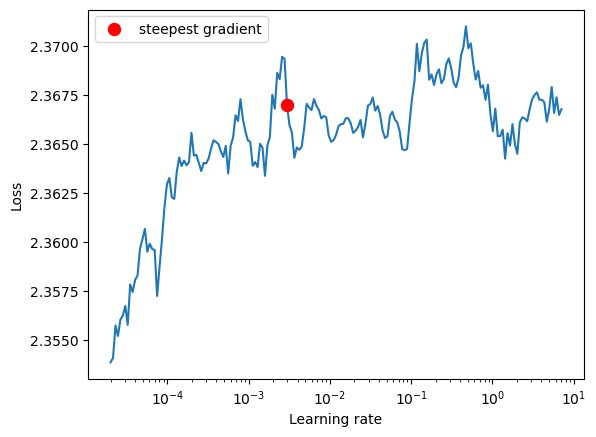

In [6]:
assignment11_trainer = Trainer(model, get_device(), train_loader, test_loader, epochs=20)

In [7]:
assignment11_trainer.exec_train_test_loop()

[INFO] Epoch #1


Loss=1.3006631135940552 Batch_id=97 Accuracy=43.95% LR=0.0009592507017776807: 100%|██████████| 98/98 [02:29<00:00,  1.53s/it] 



Test set: Average loss: 1.3212, Accuracy: 5221/10000 (52.21%)

[INFO] Epoch #2


Loss=1.0100040435791016 Batch_id=97 Accuracy=57.36% LR=0.0016286012705814103: 100%|██████████| 98/98 [02:28<00:00,  1.51s/it]



Test set: Average loss: 1.5901, Accuracy: 5049/10000 (50.49%)

[INFO] Epoch #3


Loss=0.8826324939727783 Batch_id=97 Accuracy=64.81% LR=0.00229795183938514: 100%|██████████| 98/98 [02:31<00:00,  1.55s/it]  



Test set: Average loss: 1.1274, Accuracy: 6250/10000 (62.50%)

[INFO] Epoch #4


Loss=0.7361651062965393 Batch_id=97 Accuracy=69.04% LR=0.0029673024081888696: 100%|██████████| 98/98 [02:36<00:00,  1.60s/it]



Test set: Average loss: 1.2901, Accuracy: 6156/10000 (61.56%)

[INFO] Epoch #5


Loss=0.6874006986618042 Batch_id=97 Accuracy=72.66% LR=0.0027837005716821834: 100%|██████████| 98/98 [02:51<00:00,  1.75s/it]



Test set: Average loss: 1.0471, Accuracy: 6686/10000 (66.86%)

[INFO] Epoch #6


Loss=0.6483931541442871 Batch_id=97 Accuracy=76.07% LR=0.002600098735175497: 100%|██████████| 98/98 [02:42<00:00,  1.66s/it] 



Test set: Average loss: 0.7168, Accuracy: 7568/10000 (75.68%)

[INFO] Epoch #7


Loss=0.513958215713501 Batch_id=97 Accuracy=78.26% LR=0.002416496898668811: 100%|██████████| 98/98 [02:45<00:00,  1.69s/it]  



Test set: Average loss: 0.6391, Accuracy: 7870/10000 (78.70%)

[INFO] Epoch #8


Loss=0.6253103613853455 Batch_id=97 Accuracy=79.95% LR=0.0022328950621621243: 100%|██████████| 98/98 [02:55<00:00,  1.79s/it] 



Test set: Average loss: 0.6440, Accuracy: 7907/10000 (79.07%)

[INFO] Epoch #9


Loss=0.5387020707130432 Batch_id=97 Accuracy=81.44% LR=0.002049293225655438: 100%|██████████| 98/98 [02:57<00:00,  1.81s/it]  



Test set: Average loss: 0.7133, Accuracy: 7690/10000 (76.90%)

[INFO] Epoch #10


Loss=0.5131287574768066 Batch_id=97 Accuracy=82.61% LR=0.001865691389148752: 100%|██████████| 98/98 [02:49<00:00,  1.73s/it]  



Test set: Average loss: 0.6114, Accuracy: 8019/10000 (80.19%)

[INFO] Epoch #11


Loss=0.41324397921562195 Batch_id=97 Accuracy=84.28% LR=0.0016820895526420655: 100%|██████████| 98/98 [02:43<00:00,  1.67s/it]



Test set: Average loss: 0.4693, Accuracy: 8440/10000 (84.40%)

[INFO] Epoch #12


Loss=0.4294664263725281 Batch_id=97 Accuracy=85.33% LR=0.0014984877161353792: 100%|██████████| 98/98 [02:52<00:00,  1.76s/it] 



Test set: Average loss: 0.4583, Accuracy: 8524/10000 (85.24%)

[INFO] Epoch #13


Loss=0.4957452416419983 Batch_id=97 Accuracy=86.08% LR=0.001314885879628693: 100%|██████████| 98/98 [02:52<00:00,  1.76s/it]  



Test set: Average loss: 0.4378, Accuracy: 8593/10000 (85.93%)

[INFO] Epoch #14


Loss=0.2870735824108124 Batch_id=97 Accuracy=87.26% LR=0.0011312840431220066: 100%|██████████| 98/98 [02:50<00:00,  1.74s/it] 



Test set: Average loss: 0.3934, Accuracy: 8734/10000 (87.34%)

[INFO] Epoch #15


Loss=0.3466888666152954 Batch_id=97 Accuracy=88.45% LR=0.0009476822066153204: 100%|██████████| 98/98 [02:49<00:00,  1.73s/it] 



Test set: Average loss: 0.4684, Accuracy: 8536/10000 (85.36%)

[INFO] Epoch #16


Loss=0.27960559725761414 Batch_id=97 Accuracy=89.27% LR=0.0007640803701086342: 100%|██████████| 98/98 [02:48<00:00,  1.72s/it]



Test set: Average loss: 0.3393, Accuracy: 8893/10000 (88.93%)

[INFO] Epoch #17


Loss=0.3173888325691223 Batch_id=97 Accuracy=90.40% LR=0.0005804785336019479: 100%|██████████| 98/98 [02:41<00:00,  1.65s/it] 



Test set: Average loss: 0.3541, Accuracy: 8915/10000 (89.15%)

[INFO] Epoch #18


Loss=0.28851208090782166 Batch_id=97 Accuracy=91.80% LR=0.0003968766970952613: 100%|██████████| 98/98 [02:37<00:00,  1.60s/it] 



Test set: Average loss: 0.3019, Accuracy: 9061/10000 (90.61%)

[INFO] Epoch #19


Loss=0.23910613358020782 Batch_id=97 Accuracy=92.56% LR=0.00021327486058857507: 100%|██████████| 98/98 [02:40<00:00,  1.64s/it]



Test set: Average loss: 0.2661, Accuracy: 9175/10000 (91.75%)

[INFO] Epoch #20


Loss=0.13590604066848755 Batch_id=97 Accuracy=94.01% LR=2.9673024081888853e-05: 100%|██████████| 98/98 [02:47<00:00,  1.71s/it]



Test set: Average loss: 0.2612, Accuracy: 9191/10000 (91.91%)



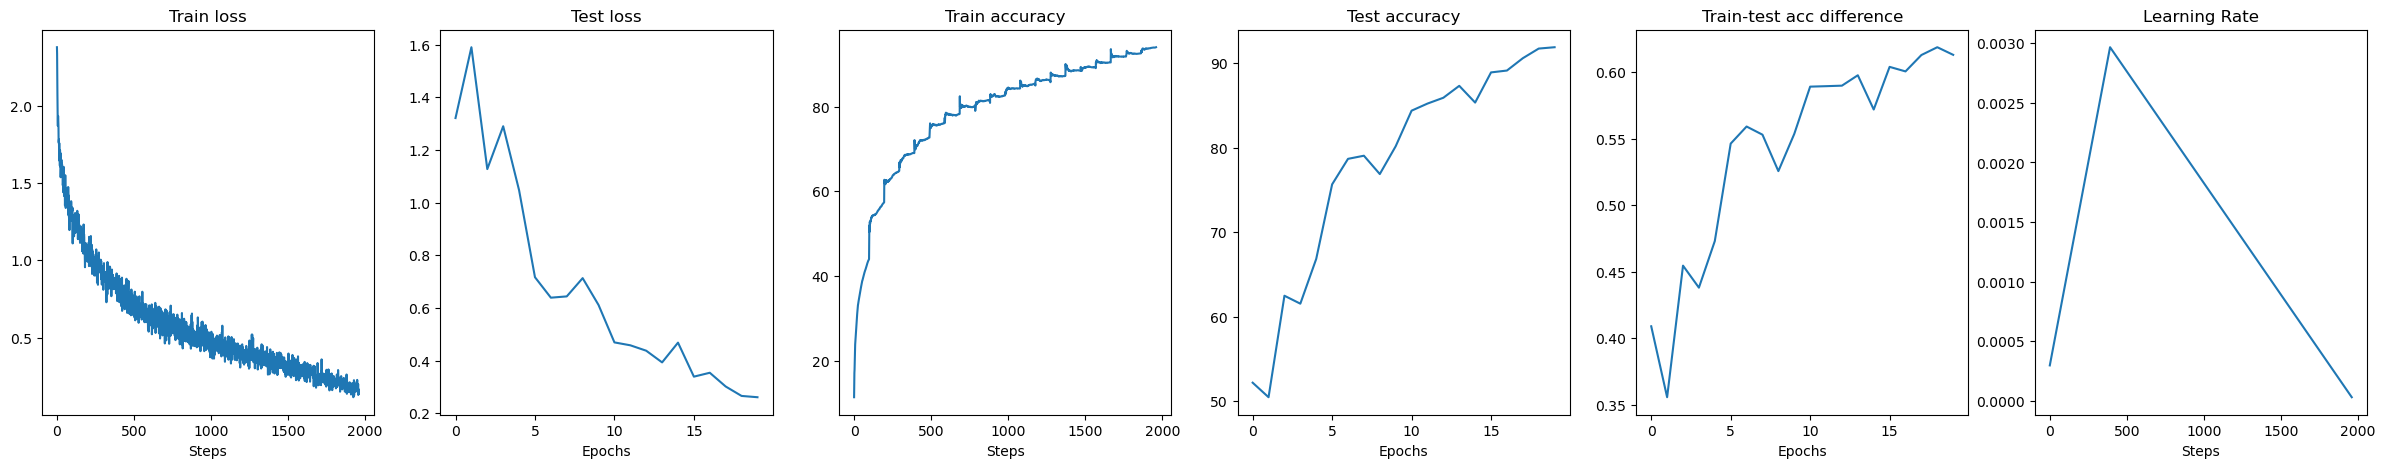

In [8]:
assignment11_trainer.visualize_loss_acc()

/var/folders/y0/gmw9s15x6rz0hhlgkyxr54k00000gn/T/ipykernel_23292/3997101970.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


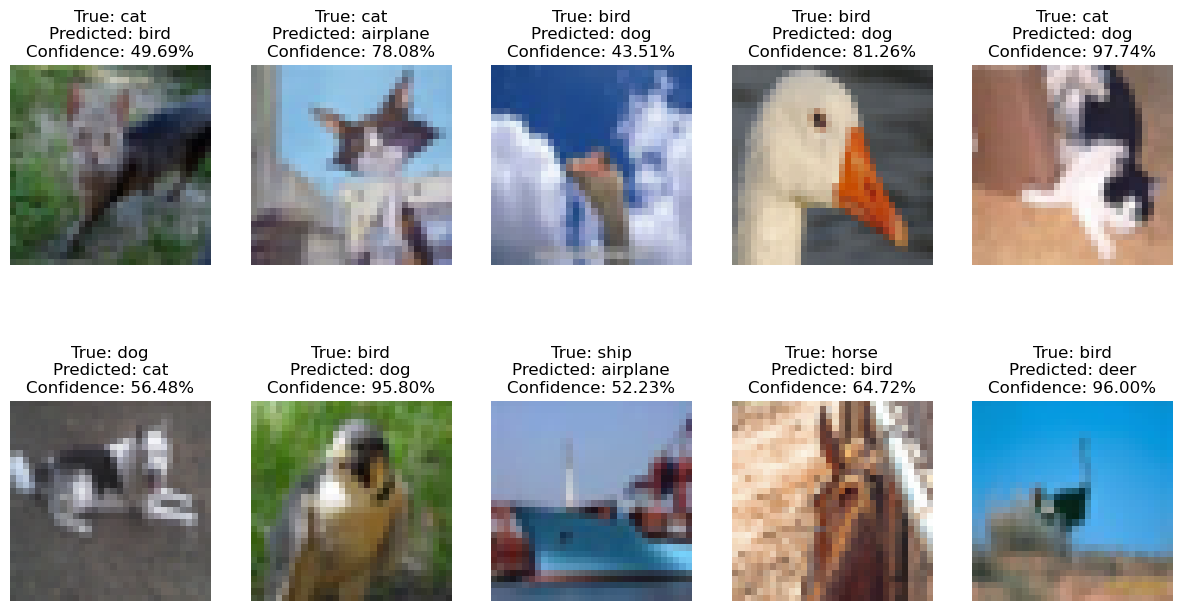

In [112]:
cifar10_classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
misclassified_dict = get_misclassified_images(model, test_loader, cifar10_classes, device=get_device())

## Gradcam

/var/folders/y0/gmw9s15x6rz0hhlgkyxr54k00000gn/T/ipykernel_23292/3771139031.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


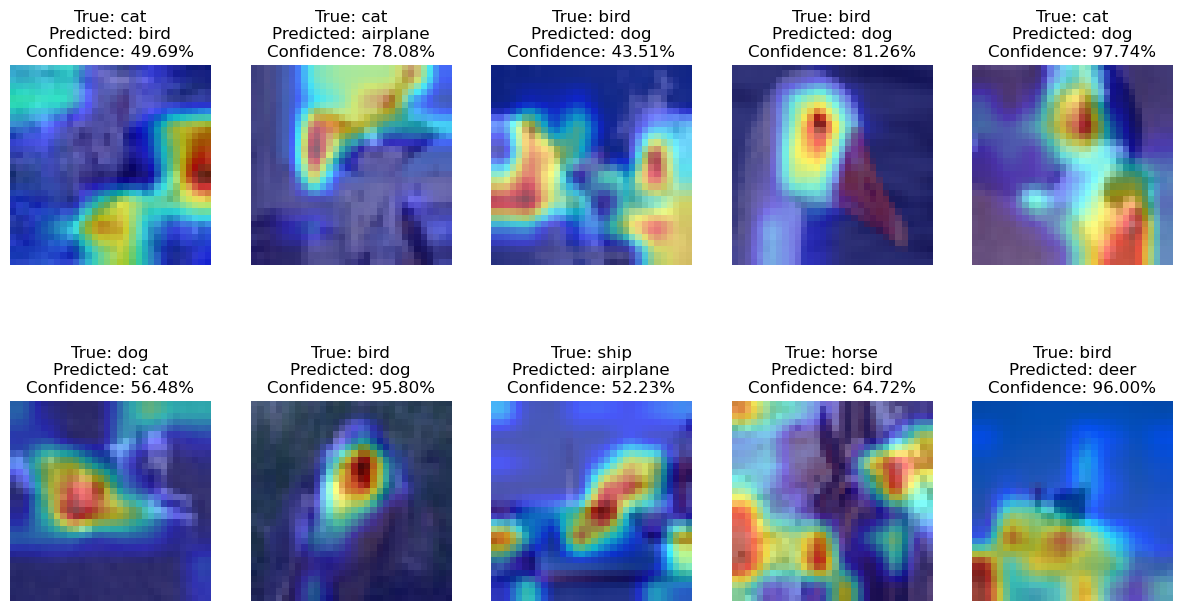

In [134]:
display_grad_cam_batch(model, [model.layer3[-1]], misclassified_dict, get_device(), cifar10_classes)

/var/folders/y0/gmw9s15x6rz0hhlgkyxr54k00000gn/T/ipykernel_23292/3771139031.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


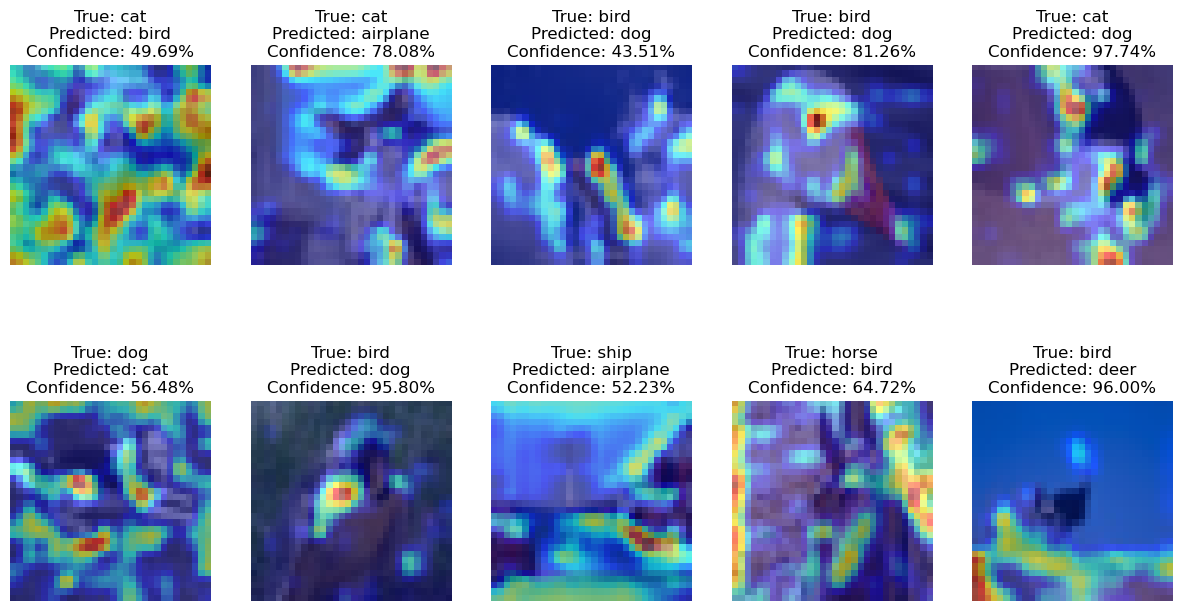

In [136]:
display_grad_cam_batch(model, [model.layer2[-1]], misclassified_dict, get_device(), cifar10_classes)